### Project Meteorite Landings on Earth Data 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_absolute_error


In [10]:
# Load the dataset
file_path = "Meteorite_Landings.csv"
df = pd.read_csv(file_path)

In [14]:
# Basic dataset information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [22]:
# Checking missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [24]:
# Handling missing values
# Fill missing mass with median
df['mass (g)'].fillna(df['mass (g)'].median(), inplace=True)

C:\Users\abeer\AppData\Local\Temp\ipykernel_9080\1116822221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mass (g)'].fillna(df['mass (g)'].median(), inplace=True)


In [26]:
# Fill missing year with mode
df['year'].fillna(df['year'].mode()[0], inplace=True)

C:\Users\abeer\AppData\Local\Temp\ipykernel_9080\1451069445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].mode()[0], inplace=True)


In [28]:
# Fill missing latitude and longitude with grouped mean by recclass
df['reclat'] = df.groupby('recclass')['reclat'].transform(lambda x: x.fillna(x.mean()))
df['reclong'] = df.groupby('recclass')['reclong'].transform(lambda x: x.fillna(x.mean()))

In [30]:
# Drop any remaining rows where reclat or reclong are still missing
df.dropna(subset=['reclat', 'reclong'], inplace=True)


In [32]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45659 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45659 non-null  object 
 1   id           45659 non-null  int64  
 2   nametype     45659 non-null  object 
 3   recclass     45659 non-null  object 
 4   mass (g)     45659 non-null  float64
 5   fall         45659 non-null  object 
 6   year         45659 non-null  float64
 7   reclat       45659 non-null  float64
 8   reclong      45659 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [34]:
# Checking missing values after handling
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 name              0
id                0
nametype          0
recclass          0
mass (g)          0
fall              0
year              0
reclat            0
reclong           0
GeoLocation    7258
dtype: int64


In [38]:
### since Now reclat and reclong have ni null values GeoLocation null values won't be a problem for further analysis ###

In [40]:
# Descriptive statistics
print(df.describe())

                 id      mass (g)          year        reclat       reclong
count  45659.000000  4.565900e+04  45659.000000  45659.000000  45659.000000
mean   26884.506625  1.325574e+04   1991.886682    -39.040624     61.261318
std    16867.950293  5.745230e+05     25.000890     43.098589     74.779113
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12675.500000  7.200000e+00   1987.000000    -76.267085     11.783330
50%    24245.000000  3.260000e+01   1998.000000    -57.950692     54.371670
75%    40666.500000  2.010100e+02   2003.000000      0.000000    155.750000
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330


In [44]:
# Set seaborn style
sns.set_style("whitegrid")

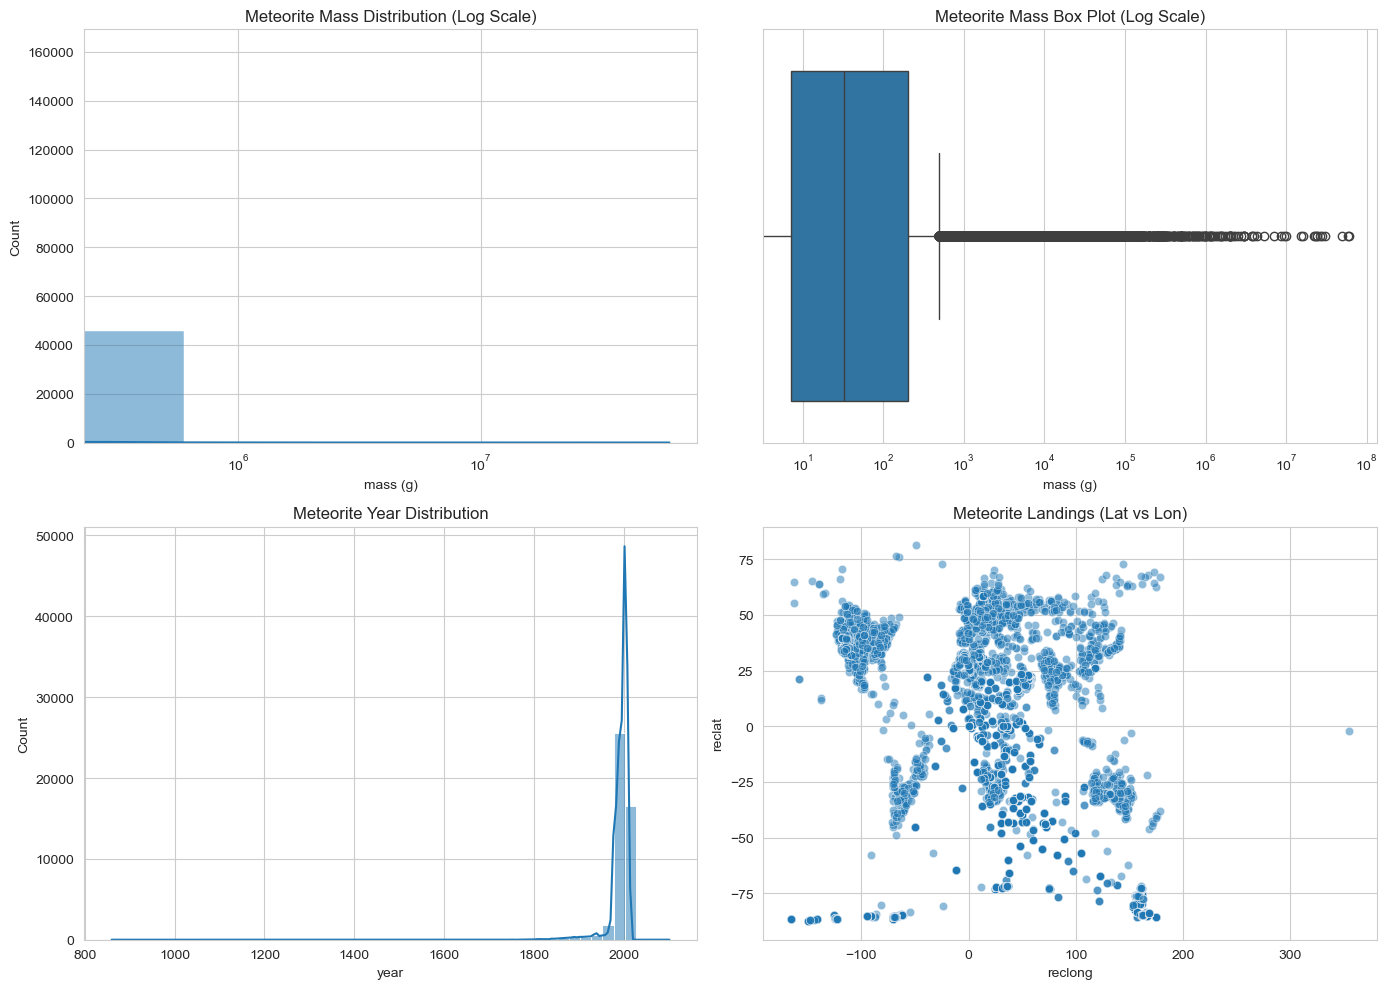

In [54]:
# Create subplots for mass, year, and lat/lon distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Mass (log scale due to skewness)
sns.histplot(df['mass (g)'], bins=100, kde=True, ax=axes[0, 0])
axes[0, 0].set_xscale("log")
axes[0, 0].set_title("Meteorite Mass Distribution (Log Scale)")

# Boxplot for Mass (identifying outliers)
sns.boxplot(x=df['mass (g)'], ax=axes[0, 1])
axes[0, 1].set_xscale("log")
axes[0, 1].set_title("Meteorite Mass Box Plot (Log Scale)")

# Histogram for Year
sns.histplot(df['year'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Meteorite Year Distribution")

# Scatter plot for Latitude vs Longitude
sns.scatterplot(x=df['reclong'], y=df['reclat'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Meteorite Landings (Lat vs Lon)")

plt.tight_layout()
plt.show()

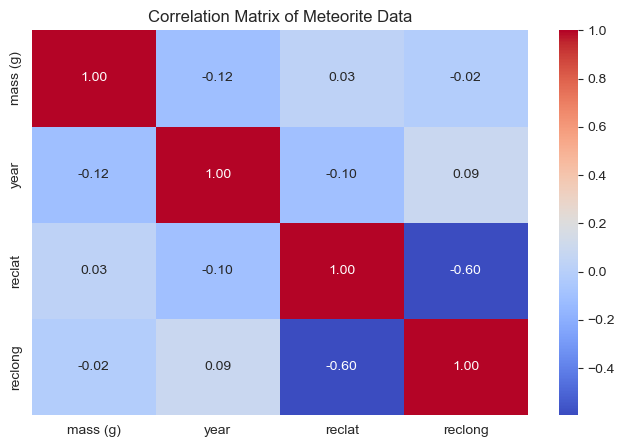

In [56]:
# Correlation matrix
correlation_matrix = df[['mass (g)', 'year', 'reclat', 'reclong']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Meteorite Data")
plt.show()

In [58]:
# Feature Engineering
# Convert 'fall' to binary (0 = Found, 1 = Fell)
df['fall_binary'] = df['fall'].map({'Found': 0, 'Fell': 1})

In [60]:
# Extract temporal trends from 'year'
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year_decade'] = (df['year'] // 10) * 10

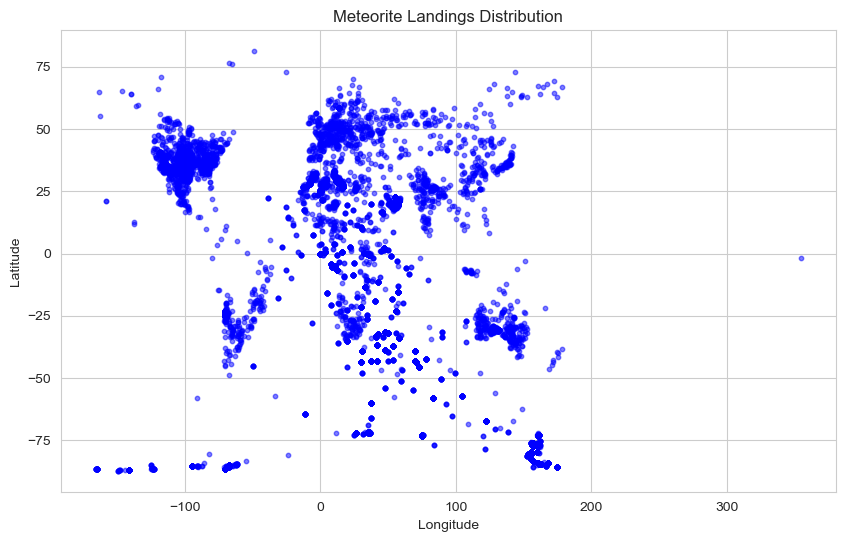

In [62]:
# Create geographic clusters
df['lat_bin'] = pd.cut(df['reclat'], bins=10, labels=False)
df['lon_bin'] = pd.cut(df['reclong'], bins=10, labels=False)

# Scatter plot for meteorite landings using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['reclong'], df['reclat'], alpha=0.5, color='blue', s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Meteorite Landings Distribution")
plt.grid(True)
plt.show()


In [70]:
pip install folium


In [80]:
import folium
from folium.plugins import HeatMap

# Drop rows with missing latitude/longitude
meteorite_map = df[['reclat', 'reclong']].dropna()

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add heatmap layer
HeatMap(meteorite_map.values, radius=8).add_to(m)

# Show map
m

### Heatmap of Meteorite Landing Density

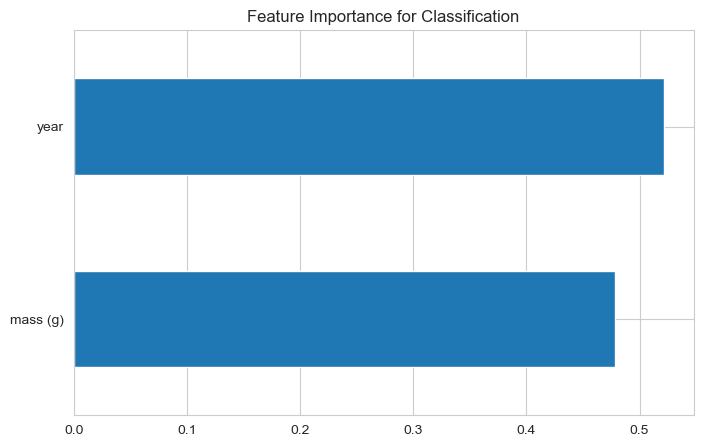

In [87]:
# Feature Importance for Prediction
clf = RandomForestClassifier(n_estimators=100, random_state=42)
X_class = df[['mass (g)', 'year']]
y_class = df['fall'].map({'Found': 0, 'Fell': 1})
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

feature_importances = pd.Series(clf.feature_importances_, index=X_class.columns)
plt.figure(figsize=(8, 5))
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance for Classification")
plt.show()


In [91]:
# Predictive Modeling using Random Forest
# Classification: Predict whether a meteorite was found or fell
X_class = df[['mass (g)', 'year']]
y_class = df['fall'].map({'Found': 0, 'Fell': 1})
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8902
           1       0.58      0.42      0.49       230

    accuracy                           0.98      9132
   macro avg       0.78      0.71      0.74      9132
weighted avg       0.97      0.98      0.98      9132



In [99]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_class))


Accuracy: 0.9777704774419623


In [93]:
# Regression: Predict mass based on features
X_reg = df[['year', 'reclat', 'reclong']]
y_reg = df['mass (g)']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
print("Mean Absolute Error (Mass Prediction):", mean_absolute_error(y_test_reg, y_pred_reg))

Mean Absolute Error (Mass Prediction): 28069.84689588647


In [101]:
from sklearn.metrics import r2_score
print("R² Score (Mass Prediction):", r2_score(y_test_reg, y_pred_reg))


R² Score (Mass Prediction): -0.07764896255159637


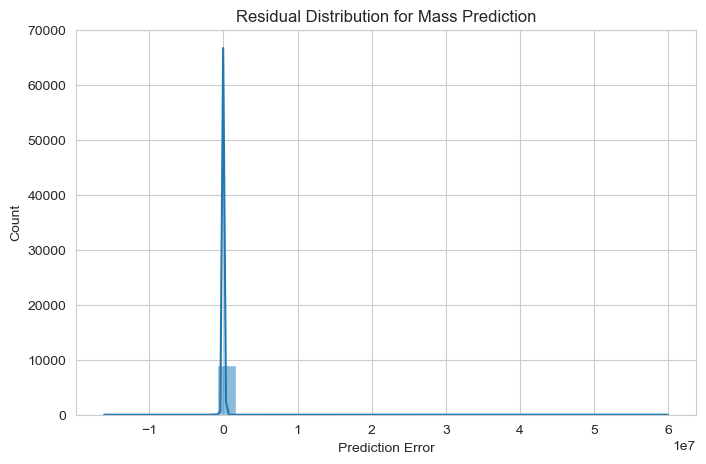

In [95]:
# Residual Plot for Regression
plt.figure(figsize=(8,5))
sns.histplot(y_test_reg - y_pred_reg, bins=30, kde=True)
plt.title("Residual Distribution for Mass Prediction")
plt.xlabel("Prediction Error")
plt.show()

In [109]:
from sklearn.ensemble import GradientBoostingRegressor


In [105]:
pip install xgboost lightgbm


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 11.0 MB/s eta 0:00:12
   -- ------------------------------------- 6.3/124.9 MB 10.2 MB/s eta 0:00:12
   -- ------------------------------------- 8.4/124.9 MB 10.2 MB/s eta 0:00:12
   --- ------------------------------------ 10.5/124.9 MB 10.4 MB/s eta 0:00:12
   ---- ----------------------------------- 12.6/124.9 MB 10.2 MB/s eta 0:00:11
   ---- ----------------------------------- 13.9/124.9 MB 10.4 MB/s eta 0:00:11
   ----- ---------------------------------- 16.8/124.9 MB 10.2 MB/s eta 0:00:11
   ----- ---------------------------------- 18.6/124.9 MB 10.0 MB/s eta 0:00:11
   ------ --------------------------------- 20.7/124.9 MB 10.0 MB/s eta 0:00:11
   ------- -------------------------------- 22.5/124.9 MB 9.9 MB/s eta 0:00:11
   ------- -------------------------------- 24.1/124.9

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8902
           1       0.58      0.42      0.49       230

    accuracy                           0.98      9132
   macro avg       0.78      0.71      0.74      9132
weighted avg       0.97      0.98      0.98      9132

Accuracy: 0.9777704774419623
Random Forest - Mean Absolute Error (Mass Prediction): 28069.84689588647
Random Forest - R² Score (Mass Prediction): -0.07764896255159637
Gradient Boosting - Mean Absolute Error (Mass Prediction): 27476.12884198515
Gradient Boosting - R² Score (Mass Prediction): -0.0345685652757004


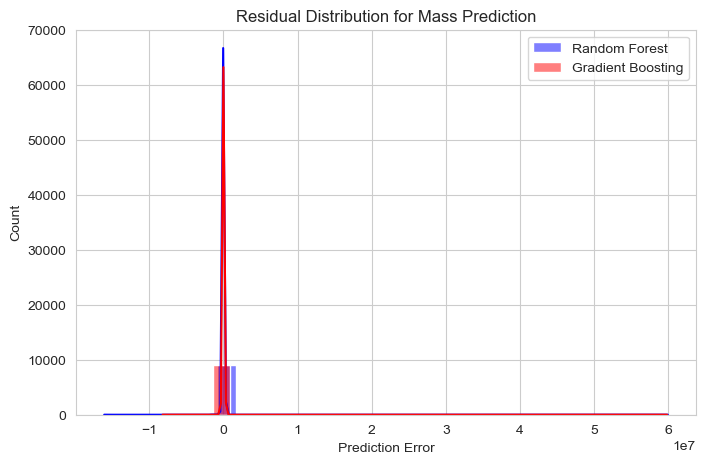

In [111]:
# Predictive Modeling using Random Forest and Gradient Boosting
# Classification: Predict whether a meteorite was found or fell
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("Accuracy:", accuracy_score(y_test, y_pred_class))

# Regression: Predict mass based on features
X_reg = df[['year', 'reclat', 'reclong']]
y_reg = df['mass (g)']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)
print("Random Forest - Mean Absolute Error (Mass Prediction):", mean_absolute_error(y_test_reg, y_pred_rf))
print("Random Forest - R² Score (Mass Prediction):", r2_score(y_test_reg, y_pred_rf))

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)
y_pred_gb = gb_reg.predict(X_test_reg)
print("Gradient Boosting - Mean Absolute Error (Mass Prediction):", mean_absolute_error(y_test_reg, y_pred_gb))
print("Gradient Boosting - R² Score (Mass Prediction):", r2_score(y_test_reg, y_pred_gb))

# Residual Plot for Regression
plt.figure(figsize=(8,5))
sns.histplot(y_test_reg - y_pred_rf, bins=30, kde=True, color='blue', label='Random Forest')
sns.histplot(y_test_reg - y_pred_gb, bins=30, kde=True, color='red', label='Gradient Boosting')
plt.title("Residual Distribution for Mass Prediction")
plt.xlabel("Prediction Error")
plt.legend()
plt.show()